#1) Cleaning data
1. Filtering out noise
2. Making data available for analysis

#2) What is statistics
<br>
Simple statistics

#3) Practical examples of data mining

#4) Dataset examples

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
single_families = pd.read_csv('https://raw.githubusercontent.com/pirple/Data-Mining-With-Python/master/Part%202/single_family_home_values.csv')

In [3]:
single_families.head()

,id,address,city,state,zipcode,latitude,longitude,bedrooms,bathrooms,rooms,squareFootage,lotSize,yearBuilt,lastSaleDate,lastSaleAmount,priorSaleDate,priorSaleAmount,estimated_value
0,39525749,8171 E 84th Ave,Denver,CO,80022,39.849160,-104.893468,3,2.0,6,1378,9968,2003.0,2009-12-17,75000,2004-05-13,165700.0,239753
1,184578398,10556 Wheeling St,Denver,CO,80022,39.888020,-104.830930,2,2.0,6,1653,6970,2004.0,2004-09-23,216935,NaN,NaN,343963
2,184430015,3190 Wadsworth Blvd,Denver,CO,80033,39.761710,-105.081070,3,1.0,0,1882,23875,1917.0,2008-04-03,330000,NaN,NaN,488840
3,155129946,3040 Wadsworth Blvd,Denver,CO,80033,39.760780,-105.081060,4,3.0,0,2400,11500,1956.0,2008-12-02,185000,2008-06-27,0.0,494073
4,245107,5615 S Eaton St,Denver,CO,80123,39.616181,-105.058812,3,4.0,8,2305,5600,1998.0,2012-07-18,308000,2011-12-29,0.0,513676


In [4]:
single_families.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               15000 non-null  int64  
 1   address          15000 non-null  object 
 2   city             15000 non-null  object 
 3   state            15000 non-null  object 
 4   zipcode          15000 non-null  int64  
 5   latitude         14985 non-null  float64
 6   longitude        14985 non-null  float64
 7   bedrooms         15000 non-null  int64  
 8   bathrooms        15000 non-null  float64
 9   rooms            15000 non-null  int64  
 10  squareFootage    15000 non-null  int64  
 11  lotSize          15000 non-null  int64  
 12  yearBuilt        14999 non-null  float64
 13  lastSaleDate     15000 non-null  object 
 14  lastSaleAmount   15000 non-null  int64  
 15  priorSaleDate    11173 non-null  object 
 16  priorSaleAmount  11287 non-null  float64
 17  estimated_va

In [5]:
single_families.shape

(15000, 18)

In [6]:
single_families.describe()

,id,zipcode,latitude,longitude,bedrooms,bathrooms,rooms,squareFootage,lotSize,yearBuilt,lastSaleAmount,priorSaleAmount,estimated_value
count,1.500000e+04,15000.000000,14985.000000,14985.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.00000,14999.000000,1.500000e+04,1.128700e+04,1.500000e+04
mean,5.176229e+07,80204.919467,39.740538,-104.964076,2.708400,2.195067,6.164133,1514.504400,5820.76620,1929.517168,4.053563e+05,2.594350e+05,6.371625e+05
std,6.190876e+07,9.715263,0.023555,0.039788,0.897231,1.166279,1.958601,830.635999,3013.27947,29.937051,7.756998e+05,3.379387e+05,5.044185e+05
min,1.433670e+05,80022.000000,39.614531,-105.108440,0.000000,0.000000,0.000000,350.000000,278.00000,1874.000000,2.590000e+02,0.000000e+00,1.477670e+05
25%,1.004802e+07,80205.000000,39.727634,-104.978737,2.000000,1.000000,5.000000,986.000000,4620.00000,1907.000000,1.940000e+05,1.100000e+05,3.984348e+05
50%,2.563241e+07,80206.000000,39.748048,-104.957689,3.000000,2.000000,6.000000,1267.500000,5950.00000,1925.000000,3.200000e+05,2.100000e+05,5.183575e+05
75%,5.114222e+07,80207.000000,39.758214,-104.937522,3.000000,3.000000,7.000000,1766.250000,6270.00000,1949.000000,4.632000e+05,3.302400e+05,6.879692e+05
max,3.209481e+08,80209.000000,39.888020,-104.830930,15.000000,12.000000,39.000000,10907.000000,122839.00000,2016.000000,4.560000e+07,1.600000e+07,1.014531e+07


One way would be to fill the NA with zeros.

In [7]:
single_families_without_na_1 = single_families.fillna(0)

In [8]:
single_families_without_na_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               15000 non-null  int64  
 1   address          15000 non-null  object 
 2   city             15000 non-null  object 
 3   state            15000 non-null  object 
 4   zipcode          15000 non-null  int64  
 5   latitude         15000 non-null  float64
 6   longitude        15000 non-null  float64
 7   bedrooms         15000 non-null  int64  
 8   bathrooms        15000 non-null  float64
 9   rooms            15000 non-null  int64  
 10  squareFootage    15000 non-null  int64  
 11  lotSize          15000 non-null  int64  
 12  yearBuilt        15000 non-null  float64
 13  lastSaleDate     15000 non-null  object 
 14  lastSaleAmount   15000 non-null  int64  
 15  priorSaleDate    15000 non-null  object 
 16  priorSaleAmount  15000 non-null  float64
 17  estimated_va

In [9]:
single_families_without_na_2 = single_families.fillna(single_families.mean())

In [10]:
single_families_without_na_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               15000 non-null  int64  
 1   address          15000 non-null  object 
 2   city             15000 non-null  object 
 3   state            15000 non-null  object 
 4   zipcode          15000 non-null  int64  
 5   latitude         15000 non-null  float64
 6   longitude        15000 non-null  float64
 7   bedrooms         15000 non-null  int64  
 8   bathrooms        15000 non-null  float64
 9   rooms            15000 non-null  int64  
 10  squareFootage    15000 non-null  int64  
 11  lotSize          15000 non-null  int64  
 12  yearBuilt        15000 non-null  float64
 13  lastSaleDate     15000 non-null  object 
 14  lastSaleAmount   15000 non-null  int64  
 15  priorSaleDate    11173 non-null  object 
 16  priorSaleAmount  15000 non-null  float64
 17  estimated_va

The Sales Date is not as that significant for our prediction also. 

We might just as well remove the column,

In [11]:
single_families_without_na_2.drop('priorSaleDate', axis=1, inplace=True)

In [12]:
single_families_without_na_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               15000 non-null  int64  
 1   address          15000 non-null  object 
 2   city             15000 non-null  object 
 3   state            15000 non-null  object 
 4   zipcode          15000 non-null  int64  
 5   latitude         15000 non-null  float64
 6   longitude        15000 non-null  float64
 7   bedrooms         15000 non-null  int64  
 8   bathrooms        15000 non-null  float64
 9   rooms            15000 non-null  int64  
 10  squareFootage    15000 non-null  int64  
 11  lotSize          15000 non-null  int64  
 12  yearBuilt        15000 non-null  float64
 13  lastSaleDate     15000 non-null  object 
 14  lastSaleAmount   15000 non-null  int64  
 15  priorSaleAmount  15000 non-null  float64
 16  estimated_value  15000 non-null  int64  
dtypes: float64(5

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


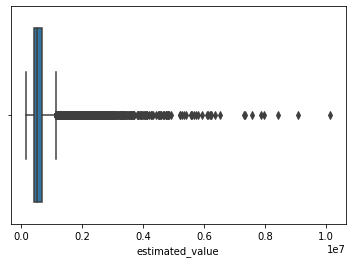

In [13]:
sns.boxplot(single_families_without_na_2.estimated_value)

Slicing some columns in the dataset

In [14]:
# single_families_without_na_2[['estimated_value','yearBuilt','priorSaleAmount']]
single_families_without_na_2[['estimated_value','yearBuilt','priorSaleAmount']].head()

,estimated_value,yearBuilt,priorSaleAmount
0,239753,2003.0,165700.000000
1,343963,2004.0,259435.014619
2,488840,1917.0,259435.014619
3,494073,1956.0,0.000000
4,513676,1998.0,0.000000


We would want to remove the outliers in our dataset and to do this we would do the following.

In [15]:
single_families_without_na_2 = single_families_without_na_2[single_families_without_na_2.estimated_value<=925000]

In [16]:
single_families_without_na_2.shape

(13397, 17)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


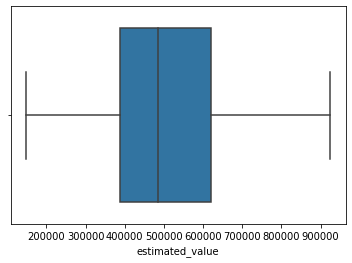

In [17]:
sns.boxplot(single_families_without_na_2.estimated_value)

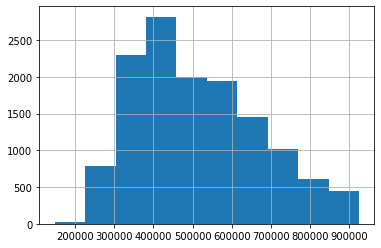

In [18]:
single_families_without_na_2.estimated_value.hist()

We will need to filter out the noise by slicing the dataset

In [19]:
single_families_without_na_2.zipcode.unique()

array([80022, 80033, 80123, 80203, 80204, 80205, 80206, 80207, 80209])

I have decided to reduce the length of my dataframe at this point. I shall call it df.

In [20]:
df = single_families_without_na_2

In [21]:
df[(df.estimated_value<=1000000) & (df.yearBuilt>2013) & (df.zipcode==80209)]

,id,address,city,state,zipcode,latitude,longitude,bedrooms,bathrooms,rooms,squareFootage,lotSize,yearBuilt,lastSaleDate,lastSaleAmount,priorSaleAmount,estimated_value
13229,3455195,866 S York St,Denver,CO,80209,39.700791,-104.960246,3,2.0,8,3332,6250,2015.0,2014-04-09,560000,127300.0,790003
13276,39512040,764 S York St,Denver,CO,80209,39.702607,-104.960243,3,4.0,7,2567,6250,2016.0,2012-07-23,420000,385000.0,770622
13316,11586398,450 S Vine St,Denver,CO,80209,39.708351,-104.962546,3,5.0,7,2570,4680,2016.0,2015-02-11,571000,399000.0,682810
13428,11586742,636 S Williams St,Denver,CO,80209,39.704969,-104.966025,3,5.0,6,2578,4680,2016.0,2015-07-22,637600,481900.0,745777
13431,184305844,456 S High St,Denver,CO,80209,39.708197,-104.964857,3,5.0,10,3346,6240,2016.0,2016-01-11,725000,124000.0,751361
13766,7652681,408 S Franklin St,Denver,CO,80209,39.709074,-104.968369,3,5.0,8,3367,5060,2015.0,2014-04-21,513486,435000.0,709102
13948,184305843,450 S High St,Denver,CO,80209,39.708333,-104.964858,3,5.0,7,3124,6240,2016.0,2014-02-20,607000,132800.0,809394
14162,30566405,876 S Williams St,Denver,CO,80209,39.700646,-104.966016,3,1.0,8,3394,6250,2015.0,2014-03-18,675000,511000.0,869769
14982,43208991,731 S Elizabeth St,Denver,CO,80209,39.703135,-104.956141,2,3.0,6,2680,6160,2016.0,2015-03-31,485000,357500.0,753935


In [22]:
df[((df.estimated_value<=1000000) | (df.yearBuilt>2013)) & (df.zipcode==80209)].shape

(1217, 17)

# Statistics 

In [23]:
df.columns.values

array(['id', 'address', 'city', 'state', 'zipcode', 'latitude',
       'longitude', 'bedrooms', 'bathrooms', 'rooms', 'squareFootage',
       'lotSize', 'yearBuilt', 'lastSaleDate', 'lastSaleAmount',
       'priorSaleAmount', 'estimated_value'], dtype=object)

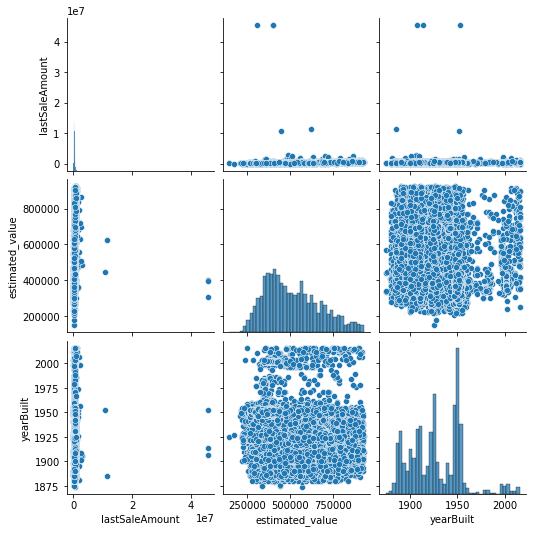

In [24]:
sns.pairplot(df[['lastSaleAmount', 'estimated_value', 'yearBuilt']])

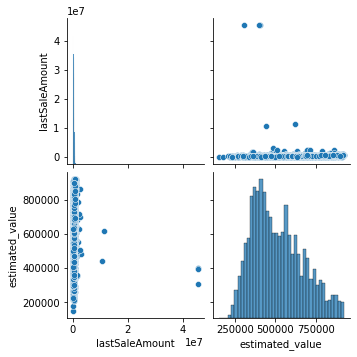

In [25]:
sns.pairplot(df[['lastSaleAmount', 'estimated_value']])

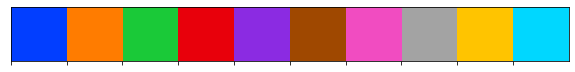

In [26]:
palette = sns.color_palette('bright')
sns.palplot(palette)
sns.set()

In [27]:
df = df[df.lastSaleAmount<=1000000]

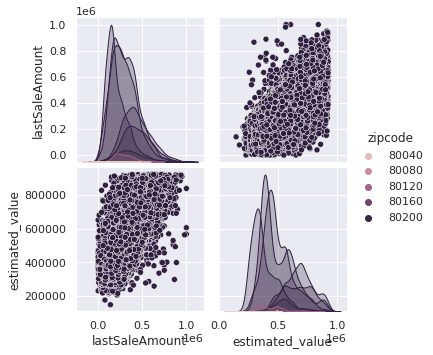

In [28]:
sns.pairplot(df[['lastSaleAmount', 'estimated_value', 'zipcode']], hue='zipcode')

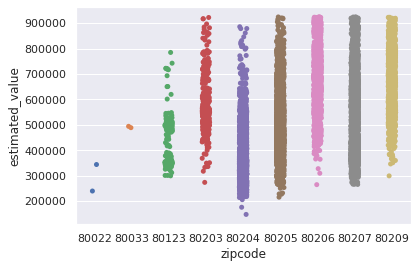

In [29]:
sns.stripplot(x=df.zipcode, y=df.estimated_value)

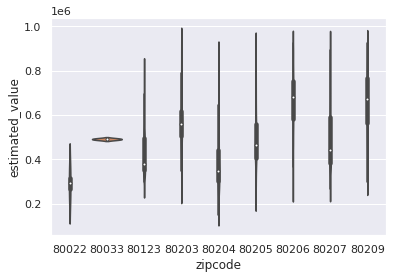

In [30]:
sns.violinplot(x=df.zipcode, y=df.estimated_value)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13364 entries, 0 to 14996
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               13364 non-null  int64  
 1   address          13364 non-null  object 
 2   city             13364 non-null  object 
 3   state            13364 non-null  object 
 4   zipcode          13364 non-null  int64  
 5   latitude         13364 non-null  float64
 6   longitude        13364 non-null  float64
 7   bedrooms         13364 non-null  int64  
 8   bathrooms        13364 non-null  float64
 9   rooms            13364 non-null  int64  
 10  squareFootage    13364 non-null  int64  
 11  lotSize          13364 non-null  int64  
 12  yearBuilt        13364 non-null  float64
 13  lastSaleDate     13364 non-null  object 
 14  lastSaleAmount   13364 non-null  int64  
 15  priorSaleAmount  13364 non-null  float64
 16  estimated_value  13364 non-null  int64  
dtypes: float64(5

In [32]:
df['lastSaleDate']=pd.to_datetime(df.lastSaleDate) 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13364 entries, 0 to 14996
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id               13364 non-null  int64         
 1   address          13364 non-null  object        
 2   city             13364 non-null  object        
 3   state            13364 non-null  object        
 4   zipcode          13364 non-null  int64         
 5   latitude         13364 non-null  float64       
 6   longitude        13364 non-null  float64       
 7   bedrooms         13364 non-null  int64         
 8   bathrooms        13364 non-null  float64       
 9   rooms            13364 non-null  int64         
 10  squareFootage    13364 non-null  int64         
 11  lotSize          13364 non-null  int64         
 12  yearBuilt        13364 non-null  float64       
 13  lastSaleDate     13364 non-null  datetime64[ns]
 14  lastSaleAmount   13364 non-null  int64

In [34]:
df['weekday_lastSaleDate'] =df.lastSaleDate.dt.weekday
df['year_lastSaleDate'] =df.lastSaleDate.dt.year

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [35]:
df.head(2)

,id,address,city,state,zipcode,latitude,longitude,bedrooms,bathrooms,rooms,squareFootage,lotSize,yearBuilt,lastSaleDate,lastSaleAmount,priorSaleAmount,estimated_value,weekday_lastSaleDate,year_lastSaleDate
0,39525749,8171 E 84th Ave,Denver,CO,80022,39.84916,-104.893468,3,2.0,6,1378,9968,2003.0,2009-12-17,75000,165700.000000,239753,3,2009
1,184578398,10556 Wheeling St,Denver,CO,80022,39.88802,-104.830930,2,2.0,6,1653,6970,2004.0,2004-09-23,216935,259435.014619,343963,3,2004


In [36]:
df.corr()

,id,zipcode,latitude,longitude,bedrooms,bathrooms,rooms,squareFootage,lotSize,yearBuilt,lastSaleAmount,priorSaleAmount,estimated_value,weekday_lastSaleDate,year_lastSaleDate
id,1.000000,-0.019123,-0.066238,0.035252,0.049834,0.103024,0.073579,0.127065,-0.006924,0.012951,0.157744,0.027112,0.164579,0.001689,0.082212
zipcode,-0.019123,1.000000,0.525196,0.392231,-0.047715,-0.078847,-0.005670,-0.085732,-0.090182,-0.227230,0.059375,0.002502,0.117667,0.002573,0.029894
latitude,-0.066238,0.525196,1.000000,0.550000,-0.015761,-0.102091,-0.117063,-0.130281,0.007890,-0.011912,-0.174519,-0.181143,-0.190196,0.001207,0.061592
longitude,0.035252,0.392231,0.550000,1.000000,-0.000546,0.088560,-0.009561,0.028937,0.069904,0.046028,0.185316,0.125466,0.244080,-0.004344,0.035624
bedrooms,0.049834,-0.047715,-0.015761,-0.000546,1.000000,0.400963,0.681400,0.641141,-0.000674,-0.109911,0.203651,0.109352,0.347823,0.003258,-0.020507
bathrooms,0.103024,-0.078847,-0.102091,0.088560,0.400963,1.000000,0.536299,0.647895,-0.009256,0.020621,0.487243,0.275581,0.628819,-0.003790,0.089093
rooms,0.073579,-0.005670,-0.117063,-0.009561,0.681400,0.536299,1.000000,0.733875,-0.093389,-0.237177,0.364308,0.235373,0.564986,0.016785,-0.042265
squareFootage,0.127065,-0.085732,-0.130281,0.028937,0.641141,0.647895,0.733875,1.000000,-0.011592,-0.161915,0.453028,0.269243,0.676664,0.000357,-0.028451
lotSize,-0.006924,-0.090182,0.007890,0.069904,-0.000674,-0.009256,-0.093389,-0.011592,1.000000,0.379946,-0.055986,-0.030894,-0.057893,0.005350,-0.030420
yearBuilt,0.012951,-0.227230,-0.011912,0.046028,-0.109911,0.020621,-0.237177,-0.161915,0.379946,1.000000,-0.146672,-0.090129,-0.249711,0.000072,0.016001


In [37]:
df.corr().loc['estimated_value', :].sort_values(ascending=False)

estimated_value         1.000000
lastSaleAmount          0.725387
squareFootage           0.676664
bathrooms               0.628819
rooms                   0.564986
priorSaleAmount         0.475613
bedrooms                0.347823
longitude               0.244080
id                      0.164579
zipcode                 0.117667
year_lastSaleDate       0.039777
weekday_lastSaleDate   -0.008083
lotSize                -0.057893
latitude               -0.190196
yearBuilt              -0.249711
Name: estimated_value, dtype: float64

# Practical data mining

In [41]:
# group by
df.groupby(['zipcode','yearBuilt']).estimated_value.mean()

zipcode  yearBuilt
80022    2003.0       239753.000000
         2004.0       343963.000000
80033    1917.0       488840.000000
         1956.0       494073.000000
80123    1959.0       352716.666667
                          ...      
80209    2006.0       847307.000000
         2008.0       790898.800000
         2010.0       796272.000000
         2015.0       789624.666667
         2016.0       752316.500000
Name: estimated_value, Length: 582, dtype: float64

In [42]:
df.groupby(['zipcode','yearBuilt']).estimated_value.mean().reset_index()

,zipcode,yearBuilt,estimated_value
0,80022,2003.0,239753.000000
1,80022,2004.0,343963.000000
2,80033,1917.0,488840.000000
3,80033,1956.0,494073.000000
4,80123,1959.0,352716.666667
...,...,...,...
577,80209,2006.0,847307.000000
578,80209,2008.0,790898.800000
579,80209,2010.0,796272.000000
580,80209,2015.0,789624.666667


In [48]:
df2 = df.groupby('zipcode').estimated_value.median().reset_index()

In [49]:
df2.columns = ['zipcode', 'median_value']

In [50]:
df2

,zipcode,median_value
0,80022,291858.0
1,80033,491456.5
2,80123,378609.5
3,80203,557347.0
4,80204,349346.5
5,80205,464390.5
6,80206,680566.5
7,80207,442205.0
8,80209,670733.5


In [51]:
# merge df
df3 = pd.merge(df, df2, on='zipcode', how='left')

In [52]:
df3.head(2)

,id,address,city,state,zipcode,latitude,longitude,bedrooms,bathrooms,rooms,squareFootage,lotSize,yearBuilt,lastSaleDate,lastSaleAmount,priorSaleAmount,estimated_value,weekday_lastSaleDate,year_lastSaleDate,median_value
0,39525749,8171 E 84th Ave,Denver,CO,80022,39.84916,-104.893468,3,2.0,6,1378,9968,2003.0,2009-12-17,75000,165700.000000,239753,3,2009,291858.0
1,184578398,10556 Wheeling St,Denver,CO,80022,39.88802,-104.830930,2,2.0,6,1653,6970,2004.0,2004-09-23,216935,259435.014619,343963,3,2004,291858.0
